In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

path = "https://raw.githubusercontent.com/aakashv-git/Projects/refs/heads/main/Water%20Quality%20Testing/Data/Preprocessing/combined_water_quality.csv"

df = pd.read_csv(path)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24546 entries, 0 to 24545
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   sampling_point                            24546 non-null  object 
 1   date                                      24546 non-null  object 
 2   time                                      24546 non-null  object 
 3   sample.samplingPoint.easting              24546 non-null  int64  
 4   sample.samplingPoint.northing             24546 non-null  int64  
 5   Alkalinity to pH 4.5 as CaCO3             24546 non-null  float64
 6   Ammoniacal Nitrogen as N                  24546 non-null  float64
 7   Calcium, Dissolved                        24546 non-null  float64
 8   Carbon, Organic, Dissolved as C :- {DOC}  24546 non-null  float64
 9   Chromium, Dissolved                       24546 non-null  float64
 10  Conductivity at 25 C              

In [4]:
import pandas as pd
import numpy as np

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# def cap_outliers_year_by_year(df, columns, threshold=3.0):
#     """
#     Caps outliers year by year at the upper/lower bound using the IQR method.
#     """
#     df_cleaned = pd.DataFrame()

#     for year in df['date'].dt.year.unique():
#         year_df = df[df['date'].dt.year == year].copy()

#         for col in columns[5:]:  # Only contaminant columns
#             Q1 = year_df[col].quantile(0.25)
#             Q3 = year_df[col].quantile(0.75)
#             IQR = Q3 - Q1

#             lower_bound = Q1 - threshold * IQR
#             upper_bound = Q3 + threshold * IQR

#             # Cap the outliers
#             year_df[col] = np.clip(year_df[col], lower_bound, upper_bound)

#         df_cleaned = pd.concat([df_cleaned, year_df])

#     return df_cleaned

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

def cap_outliers_month_by_month(df, contaminant_cols, threshold=3.0):
    """
    Caps outliers month by month using IQR method.

    Parameters:
    - df (DataFrame): The input dataset.
    - contaminant_cols (list): List of contaminant columns to cap.
    - threshold (float): Threshold for IQR capping (default is 3.0).

    Returns:
    - DataFrame: Dataset with capped outliers.
    """
    # Ensure date is in datetime format
    df['date'] = pd.to_datetime(df['date'])

    # Extract year and month
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month

    capped_df = pd.DataFrame()

    # Iterate over year and month combinations
    for (year, month), group in df.groupby(['year', 'month']):
        for col in contaminant_cols:
            Q1 = group[col].quantile(0.25)
            Q3 = group[col].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR

            # Apply capping within the group
            group[col] = np.clip(group[col], lower_bound, upper_bound)

        # Append the modified group to the final dataset
        capped_df = pd.concat([capped_df, group], ignore_index=True)

    # Remove the temporary 'year' and 'month' columns
    capped_df.drop(['year', 'month'], axis=1, inplace=True)

    return capped_df


In [6]:
contaminant_cols = [
    "Alkalinity to pH 4.5 as CaCO3",
    "Ammoniacal Nitrogen as N",
    "Calcium, Dissolved",
    "Carbon, Organic, Dissolved as C :- {DOC}",
    "Chromium, Dissolved",
    # "Conductivity at 25 C",
    "Copper, Dissolved",
    "Iron, Dissolved",
    "Lead, Dissolved",
    "Manganese, Dissolved",
    "Nickel, Dissolved",
    "Nitrate as N",
    "Nitrogen, Total Oxidised as N",
    "Orthophosphate, reactive as P",
    "Oxygen, Dissolved as O2",
    "Oxygen, Dissolved, % Saturation",
    "Temperature of Water",
    "pH"
]

# Use the function with capping
df_capped = cap_outliers_month_by_month(df, contaminant_cols, threshold=3.0)

In [7]:
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24546 entries, 0 to 24545
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   sampling_point                            24546 non-null  object        
 1   date                                      24546 non-null  datetime64[ns]
 2   time                                      24546 non-null  object        
 3   sample.samplingPoint.easting              24546 non-null  int64         
 4   sample.samplingPoint.northing             24546 non-null  int64         
 5   Alkalinity to pH 4.5 as CaCO3             24546 non-null  float64       
 6   Ammoniacal Nitrogen as N                  24546 non-null  float64       
 7   Calcium, Dissolved                        24546 non-null  float64       
 8   Carbon, Organic, Dissolved as C :- {DOC}  24546 non-null  float64       
 9   Chromium, Dissolved         

In [9]:
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_capped.shape}")
print(f"Rows removed: {df.shape[0] - df_capped.shape[0]}")


Original shape: (24546, 25)
Cleaned shape: (24546, 23)
Rows removed: 0


Missing Values:
 sampling_point                              0
date                                        0
time                                        0
sample.samplingPoint.easting                0
sample.samplingPoint.northing               0
Alkalinity to pH 4.5 as CaCO3               0
Ammoniacal Nitrogen as N                    0
Calcium, Dissolved                          0
Carbon, Organic, Dissolved as C :- {DOC}    0
Chromium, Dissolved                         0
Conductivity at 25 C                        0
Copper, Dissolved                           0
Iron, Dissolved                             0
Lead, Dissolved                             0
Manganese, Dissolved                        0
Nickel, Dissolved                           0
Nitrate as N                                0
Nitrogen, Total Oxidised as N               0
Orthophosphate, reactive as P               0
Oxygen, Dissolved as O2                     0
Oxygen, Dissolved, % Saturation             0
Temperature of Wa

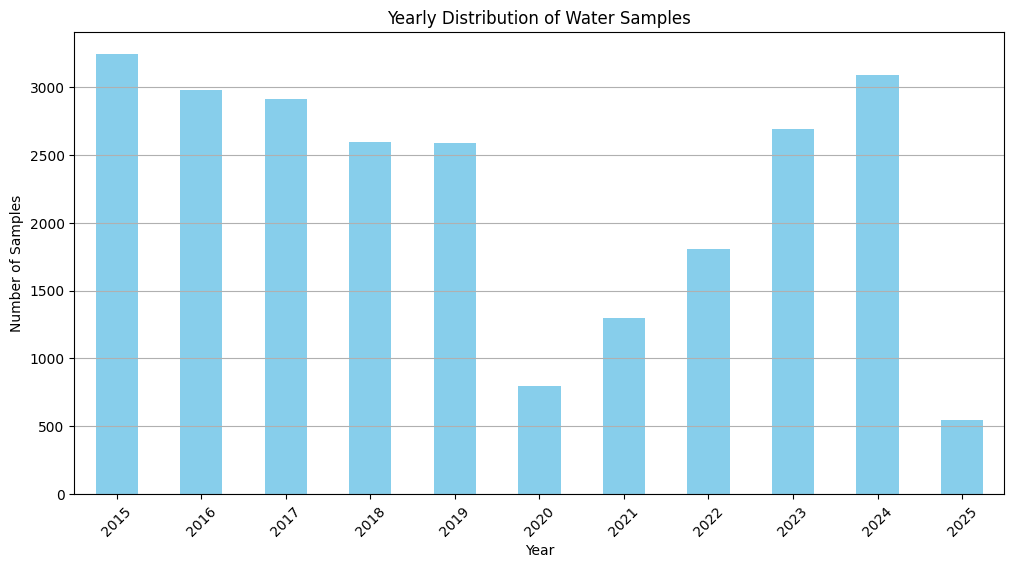

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = df_capped

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Display basic info and statistics
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# Yearly distribution of samples
df['year'] = pd.to_datetime(df['date']).dt.year
yearly_distribution = df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
yearly_distribution.plot(kind='bar', color='skyblue')
plt.title("Yearly Distribution of Water Samples")
plt.xlabel("Year")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


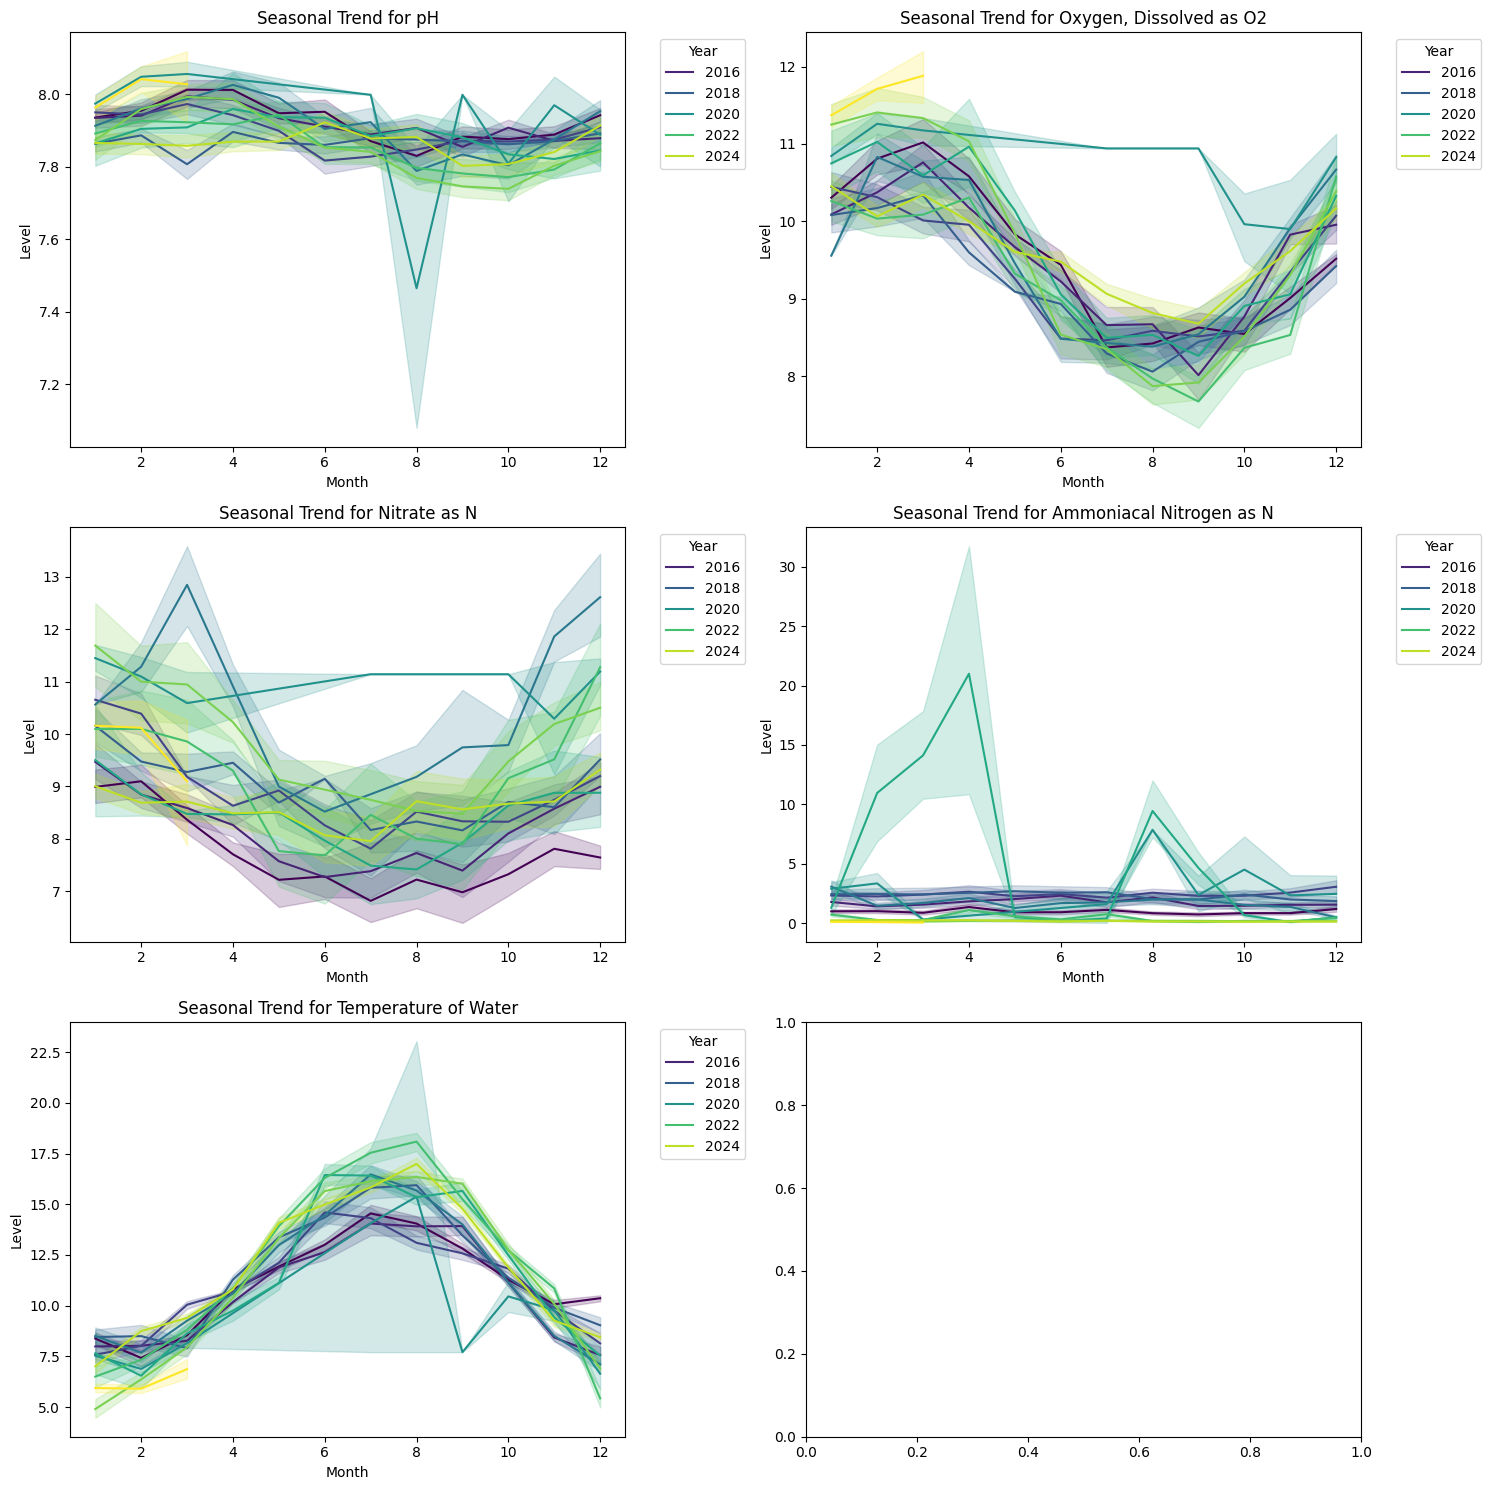

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

df['date'] = pd.to_datetime(df['date'], errors='coerce')
# Extract month and year for seasonal analysis
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Plot seasonal trends
contaminants = [
    "pH", "Oxygen, Dissolved as O2", "Nitrate as N",
    "Ammoniacal Nitrogen as N", "Temperature of Water"
]

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i, contaminant in enumerate(contaminants):
    ax = axes[i // 2, i % 2]

    sns.lineplot(data=df, x='month', y=contaminant, hue='year', ax=ax, palette='viridis')
    ax.set_title(f"Seasonal Trend for {contaminant}")
    ax.set_xlabel("Month")
    ax.set_ylabel("Level")
    ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


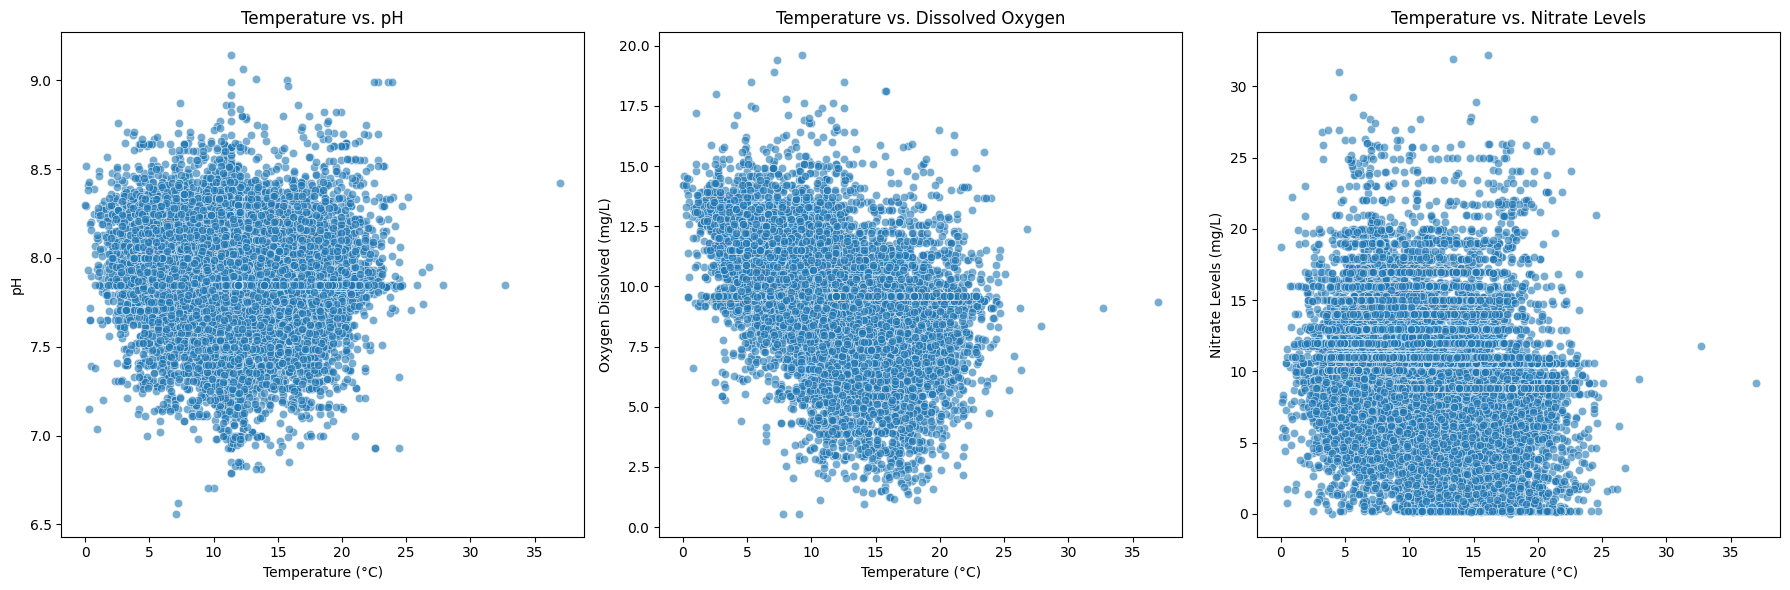

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Temperature vs pH
sns.scatterplot(x='Temperature of Water', y='pH', data=df, ax=axes[0], alpha=0.6)
axes[0].set_title("Temperature vs. pH")
axes[0].set_xlabel("Temperature (°C)")
axes[0].set_ylabel("pH")

# Temperature vs Dissolved Oxygen
sns.scatterplot(x='Temperature of Water', y='Oxygen, Dissolved as O2', data=df, ax=axes[1], alpha=0.6)
axes[1].set_title("Temperature vs. Dissolved Oxygen")
axes[1].set_xlabel("Temperature (°C)")
axes[1].set_ylabel("Oxygen Dissolved (mg/L)")

# Temperature vs Nitrate
sns.scatterplot(x='Temperature of Water', y='Nitrate as N', data=df, ax=axes[2], alpha=0.6)
axes[2].set_title("Temperature vs. Nitrate Levels")
axes[2].set_xlabel("Temperature (°C)")
axes[2].set_ylabel("Nitrate Levels (mg/L)")

plt.tight_layout()
plt.show()


In [13]:
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df,
                       geometry=gpd.points_from_xy(df['sample.samplingPoint.easting'],
                                                   df['sample.samplingPoint.northing']),
                       crs="EPSG:27700")  # British National Grid CRS

# Convert CRS to WGS84 for folium mapping
gdf = gdf.to_crs(epsg=4326)

# Initialize map
m = folium.Map(location=[52.2, 0.12], zoom_start=8)

# Add marker clusters
marker_cluster = MarkerCluster().add_to(m)

for _, row in gdf.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=5,
        popup=(
            f"Point: {row['sampling_point']}<br>"
            f"pH: {row['pH']:.2f}<br>"
            f"Oxygen: {row['Oxygen, Dissolved as O2']:.2f} mg/L<br>"
            f"Temperature: {row['Temperature of Water']:.2f} °C"
        ),
        color='blue' if row['pH'] > 7 else 'red',
        fill=True,
        fill_color='blue' if row['pH'] > 7 else 'red'
    ).add_to(marker_cluster)

# Display the map
m.save("water_quality_map.html")
print("Map saved as water_quality_map.html")


Map saved as water_quality_map.html


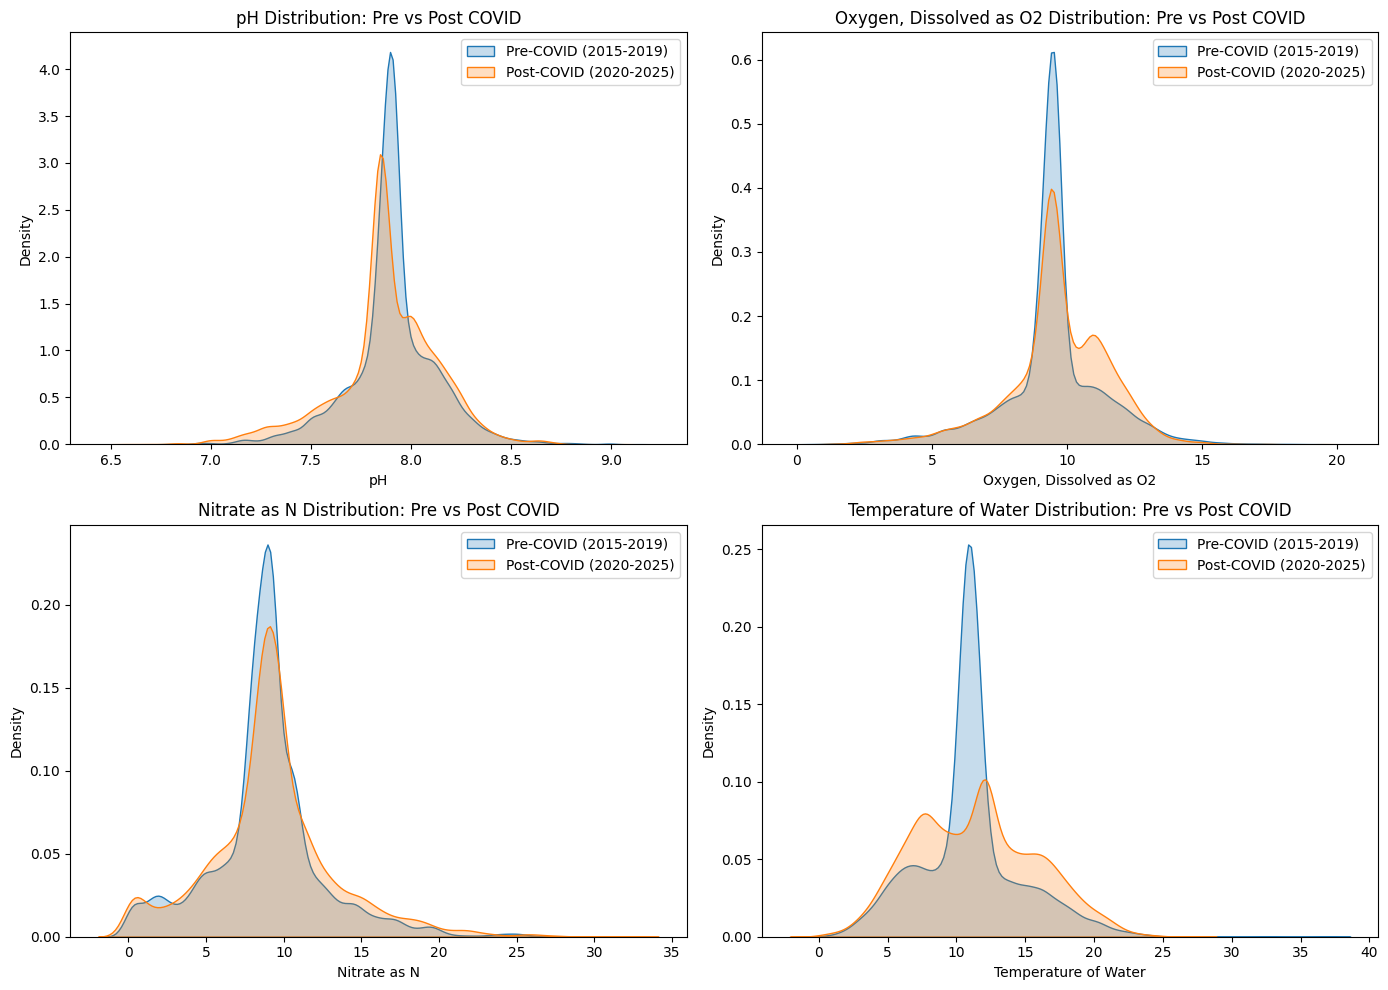

In [14]:
import matplotlib.pyplot as plt

# Filter pre and post COVID samples
pre_covid = df[df['year'] < 2020]
post_covid = df[df['year'] >= 2020]

# Key contaminants
contaminants = ["pH", "Oxygen, Dissolved as O2", "Nitrate as N", "Temperature of Water"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for i, contaminant in enumerate(contaminants):
    ax = axes[i // 2, i % 2]

    sns.kdeplot(pre_covid[contaminant], label='Pre-COVID (2015-2019)', ax=ax, fill=True)
    sns.kdeplot(post_covid[contaminant], label='Post-COVID (2020-2025)', ax=ax, fill=True)

    ax.set_title(f"{contaminant} Distribution: Pre vs Post COVID")
    ax.set_xlabel(contaminant)
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()


In [15]:
# Define the standards and weights
standards = {
    "pH": 8.5,
    "Oxygen, Dissolved as O2": 14.0,
    "Nitrate as N": 10.0,
    "Ammoniacal Nitrogen as N": 1.5,
    "Conductivity at 25 C": 1000.0,
    "Temperature of Water": 25.0,
    "Orthophosphate, reactive as P": 0.1,
    "Lead, Dissolved": 0.01,
    "Iron, Dissolved": 0.3,
    "Copper, Dissolved": 1.3
}

ideal_values = {
    "pH": 7.0,
    "Oxygen, Dissolved as O2": 8.0,
    "Nitrate as N": 0.0,
    "Ammoniacal Nitrogen as N": 0.0,
    "Conductivity at 25 C": 0.0,
    "Temperature of Water": 15.0,
    "Orthophosphate, reactive as P": 0.0,
    "Lead, Dissolved": 0.0,
    "Iron, Dissolved": 0.0,
    "Copper, Dissolved": 0.0
}

weights = {
    "pH": 0.11,
    "Oxygen, Dissolved as O2": 0.17,
    "Nitrate as N": 0.10,
    "Ammoniacal Nitrogen as N": 0.09,
    "Conductivity at 25 C": 0.08,
    "Temperature of Water": 0.05,
    "Orthophosphate, reactive as P": 0.07,
    "Lead, Dissolved": 0.06,
    "Iron, Dissolved": 0.04,
    "Copper, Dissolved": 0.03
}

def calculate_wqi_fixed(row):
    qi_sum = 0
    weight_sum = 0

    for param, standard in standards.items():
        if param in row:
            ideal = ideal_values[param]
            weight = weights[param]

            Vi = row[param]

            # Correct Qi calculation with capping
            if Vi <= ideal:
                Qi = 0
            elif Vi >= standard:
                Qi = 100  # Cap the maximum Qi at 100
            else:
                Qi = ((Vi - ideal) / (standard - ideal)) * 100

            # Weighted Qi sum
            qi_sum += Qi * weight
            weight_sum += weight

    # Calculate WQI
    wqi = qi_sum / weight_sum if weight_sum != 0 else 0
    return round(wqi, 2)

# Apply the corrected WQI calculation
df['WQI'] = df.apply(calculate_wqi_fixed, axis=1)

# Display sample WQI values
print("\nCorrected WQI calculation completed!")
print(df[['date', 'WQI']].head())



Corrected WQI calculation completed!
        date    WQI
0 2015-01-19  63.61
1 2015-01-21  63.99
2 2015-01-23  65.84
3 2015-01-15  66.16
4 2015-01-21  75.17


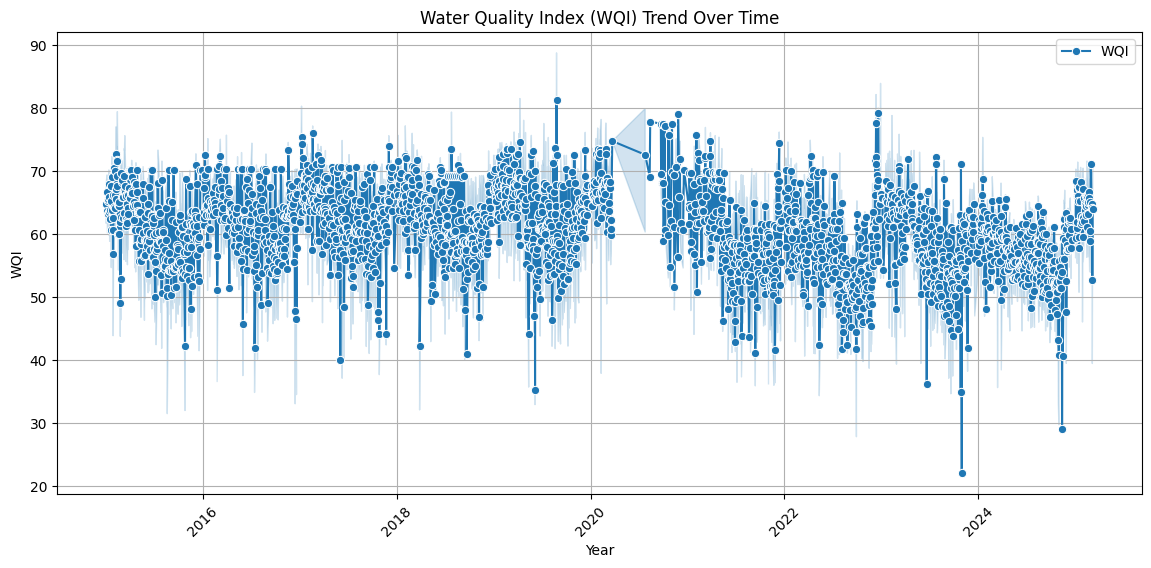

<ipython-input-16-89d7c2741563>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='WQI_Category', data=df, palette='viridis')


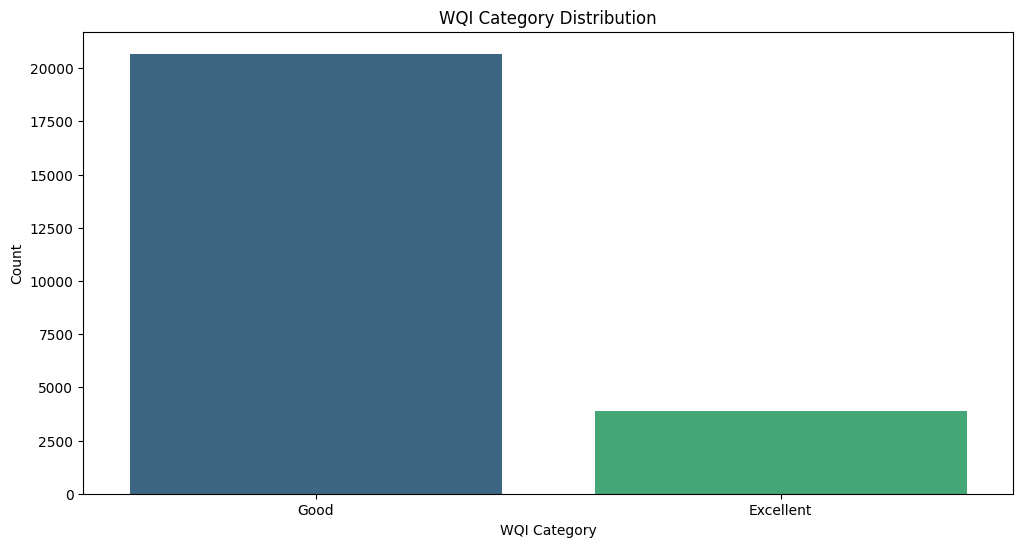


Final dataset with WQI and categories saved successfully! ✅


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🟢 Step 1: WQI Classification
def classify_wqi(wqi):
    if wqi <= 50:
        return "Excellent"
    elif wqi <= 100:
        return "Good"
    elif wqi <= 200:
        return "Poor"
    elif wqi <= 300:
        return "Very Poor"
    else:
        return "Unsuitable"

# Apply classification
df['WQI_Category'] = df['WQI'].apply(classify_wqi)

# 🟡 Step 2: Visualize WQI Trend Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='WQI', data=df, marker='o', label='WQI')
plt.title('Water Quality Index (WQI) Trend Over Time')
plt.xlabel('Year')
plt.ylabel('WQI')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 🟠 Step 3: WQI Category Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='WQI_Category', data=df, palette='viridis')
plt.title('WQI Category Distribution')
plt.xlabel('WQI Category')
plt.ylabel('Count')
plt.show()

# 🔵 Step 4: Save the Processed Dataset
df.to_csv("water_quality_wqi_final.csv", index=False)
print("\nFinal dataset with WQI and categories saved successfully! ✅")


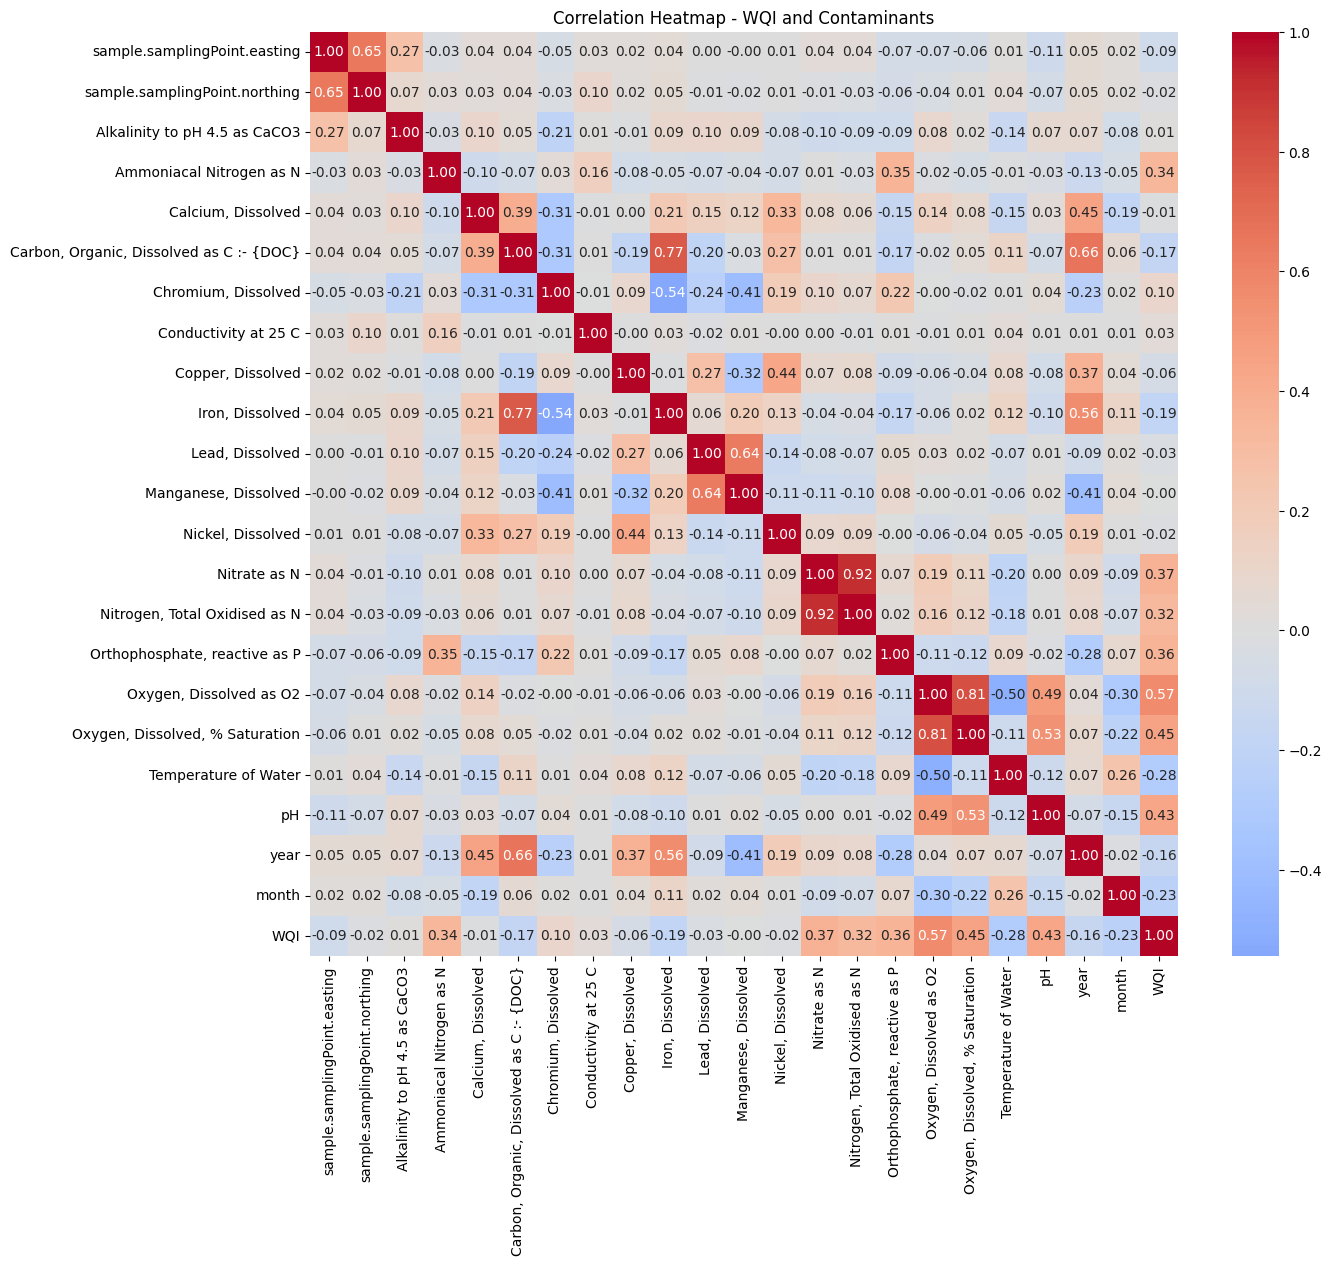


🔍 Top 5 Most Influential Contaminants on WQI:
Oxygen, Dissolved as O2            0.568836
Oxygen, Dissolved, % Saturation    0.449825
pH                                 0.430207
Nitrate as N                       0.368546
Orthophosphate, reactive as P      0.358898
Name: WQI, dtype: float64


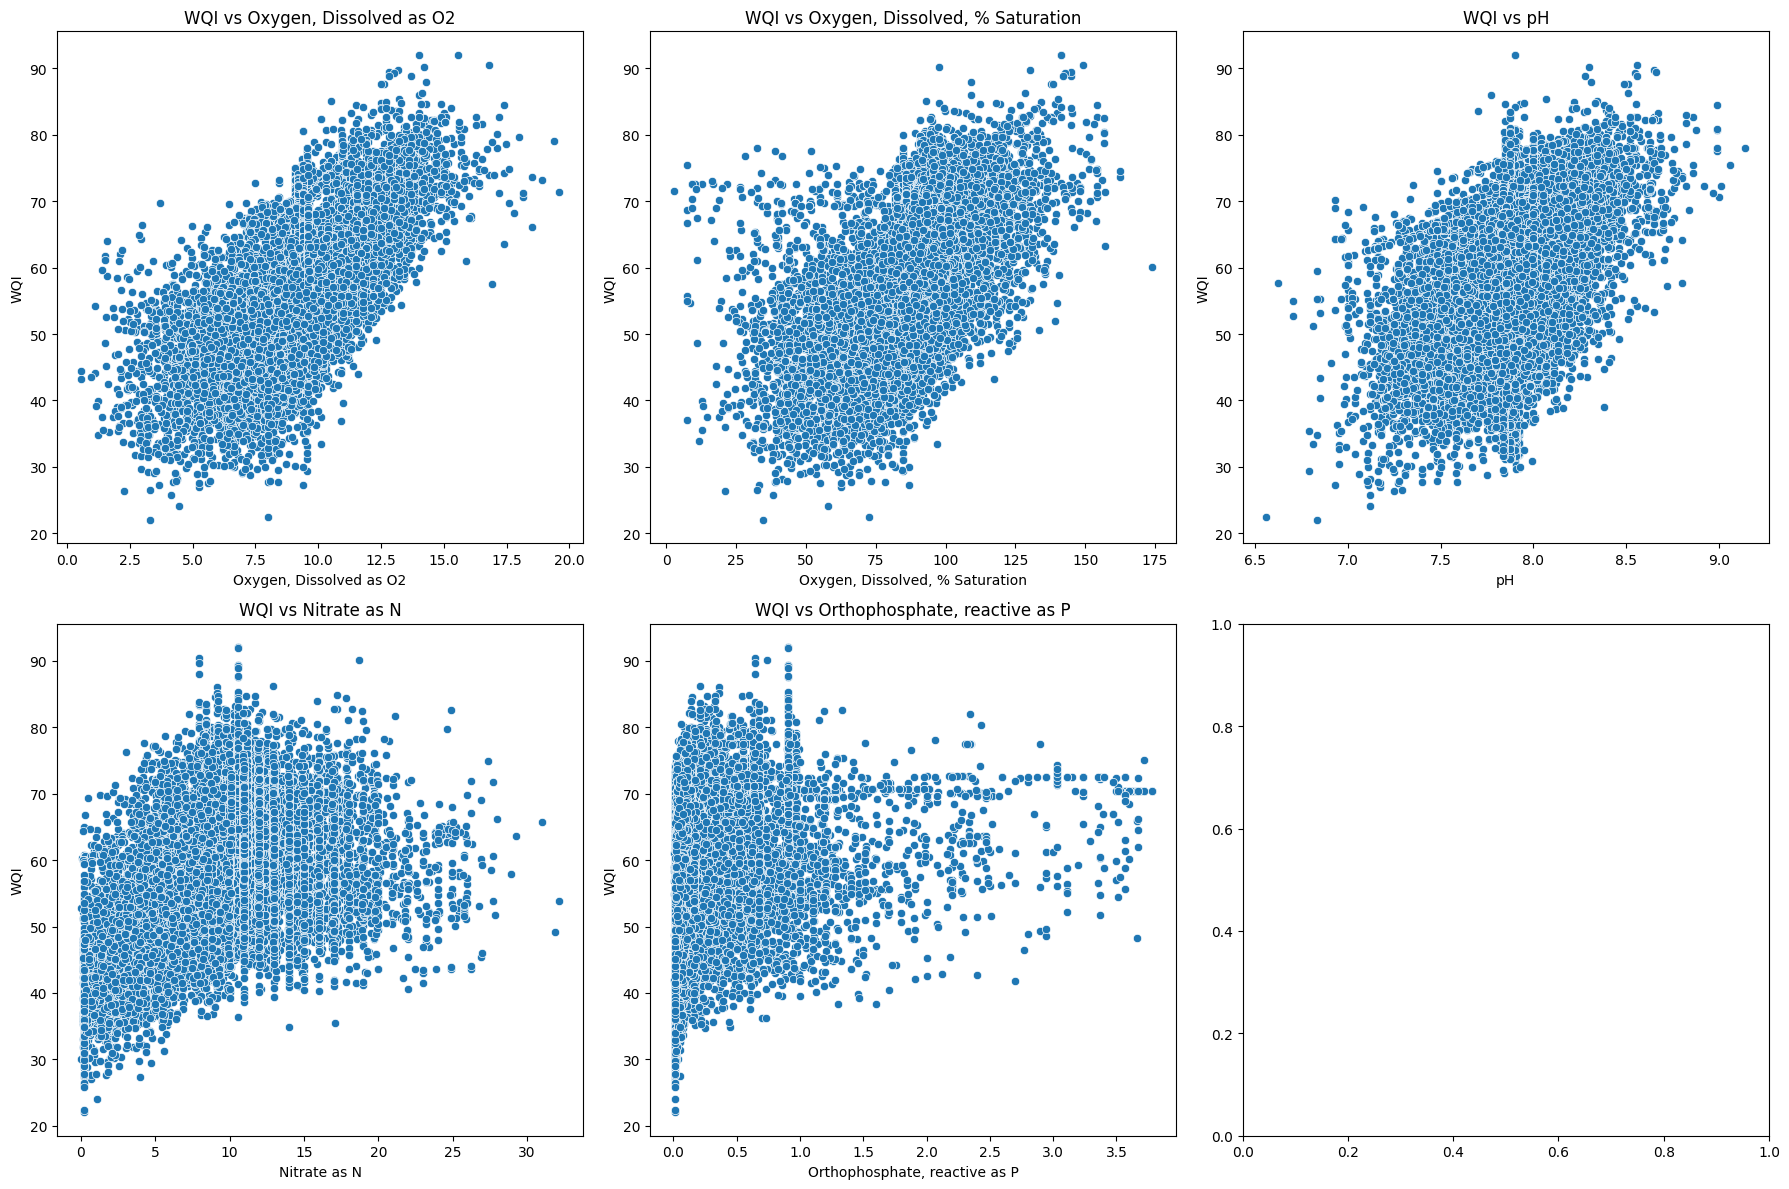

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 🟢 Step 1: Correlation Matrix
correlation_matrix = df.corr(numeric_only=True)

# Correlation of WQI with contaminants
wqi_corr = correlation_matrix['WQI'].sort_values(ascending=False)

# 🟡 Step 2: Heatmap Visualization
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - WQI and Contaminants')
plt.show()

# 🟠 Step 3: Top 5 Influential Contaminants
top_contaminants = wqi_corr.drop('WQI').abs().sort_values(ascending=False).head(5)
print("\n🔍 Top 5 Most Influential Contaminants on WQI:")
print(top_contaminants)

# 🟣 Step 4: Scatter Plots of WQI vs Top Influencing Contaminants
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for idx, contaminant in enumerate(top_contaminants.index):
    ax = axes[idx // 3, idx % 3]
    sns.scatterplot(x=contaminant, y='WQI', data=df, ax=ax)
    ax.set_title(f'WQI vs {contaminant}')
    ax.set_xlabel(contaminant)
    ax.set_ylabel('WQI')

plt.tight_layout()
plt.show()
